<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Some-relevant-filters" data-toc-modified-id="Some-relevant-filters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Some relevant filters</a></span><ul class="toc-item"><li><span><a href="#&quot;Ideal&quot;-filters:-Lowpass,-bandpass,-highpass" data-toc-modified-id="&quot;Ideal&quot;-filters:-Lowpass,-bandpass,-highpass-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>"Ideal" filters: Lowpass, bandpass, highpass</a></span></li><li><span><a href="#Gaussian-filters:-smoothing" data-toc-modified-id="Gaussian-filters:-smoothing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gaussian filters: smoothing</a></span></li></ul></li><li><span><a href="#Visual-processing-as-a-cascade-of-filtering-operations" data-toc-modified-id="Visual-processing-as-a-cascade-of-filtering-operations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visual processing as a cascade of filtering operations</a></span><ul class="toc-item"><li><span><a href="#The-receptive-field-of-a-visual-neuron-as-a-filter" data-toc-modified-id="The-receptive-field-of-a-visual-neuron-as-a-filter-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The receptive field of a visual neuron as a filter</a></span></li><li><span><a href="#Receptive-fields-of-retinal-ganglion-cells-and-cells-in-LGN" data-toc-modified-id="Receptive-fields-of-retinal-ganglion-cells-and-cells-in-LGN-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Receptive fields of retinal ganglion cells and cells in LGN</a></span></li><li><span><a href="#Receptive-fields-of-cells-in-V1" data-toc-modified-id="Receptive-fields-of-cells-in-V1-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Receptive fields of cells in V1</a></span></li></ul></li><li><span><a href="#To-do:-add-relationship-between-RGC-RFs-and-V1-RFs" data-toc-modified-id="To-do:-add-relationship-between-RGC-RFs-and-V1-RFs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>To-do: add relationship between RGC-RFs and V1-RFs</a></span></li><li><span><a href="#Spatiotemporal-properties-of-the-visual-system" data-toc-modified-id="Spatiotemporal-properties-of-the-visual-system-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Spatiotemporal properties of the visual system</a></span><ul class="toc-item"><li><span><a href="#The-contrast-sensitivity-function" data-toc-modified-id="The-contrast-sensitivity-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The contrast sensitivity function</a></span></li><li><span><a href="#The-CSF-and-multi-scale-spatial-filtering" data-toc-modified-id="The-CSF-and-multi-scale-spatial-filtering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The CSF and multi-scale spatial filtering</a></span></li></ul></li><li><span><a href="#Other-applications" data-toc-modified-id="Other-applications-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Other applications</a></span><ul class="toc-item"><li><span><a href="#Multi-scale-spatial-filtering-and-brightness-perception" data-toc-modified-id="Multi-scale-spatial-filtering-and-brightness-perception-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Multi-scale spatial filtering and brightness perception</a></span></li><li><span><a href="#Consequences-of-fixational-eye-movements" data-toc-modified-id="Consequences-of-fixational-eye-movements-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Consequences of fixational eye movements</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import scipy.fft
import scipy.signal
import matplotlib.pyplot as plt
from ipywidgets import interactive
from ipywidgets import FloatSlider
import cv2

%matplotlib inline

## Some relevant filters

To demonstrate some relevant filters, let's use some example inputs:
- (1) A compound grating
- (2) A natural image

In [2]:
# Parameters and read-in image
ppd = 128.             # Spatial resolution, pixels per degree
extent = (-5, 5,)  # Visual extent in deg

nX = int(extent[1]*ppd - extent[0]*ppd)
x = np.linspace(extent[0], extent[1], nX, endpoint=False)
yy, xx = np.meshgrid(x, x)

f = scipy.fft.fftshift(scipy.fft.fftfreq(nX, d=(1/ppd)))
fy, fx = np.meshgrid(f, f)
fextent = (f.min(), f.max(),)

In [3]:
# Read-in an image
img = cv2.cvtColor(cv2.imread('monroe.png'), cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, [nX, nX]) / 255
img_fft = scipy.fft.fft2(img)

In [4]:
def grating(frequency, orientation=0., phase=0, amplitude=1., mean=0.):
    alpha = [np.cos(orientation), np.sin(orientation)]
    g = amplitude * np.sin((alpha[0]*xx + alpha[1]*yy) * 2. * np.pi * frequency + phase) + mean
    return g

def gaussian2d(x, y, sigma, orientation=0):
    # determine a, b, c coefficients
    a = (np.cos(orientation)**2 / (2*sigma[0]**2)) + (np.sin(orientation)**2 / (2*sigma[1]**2))
    b = -(np.sin(2*orientation) / (4*sigma[0]**2)) + (np.sin(2*orientation) / (4*sigma[1]**2))
    c = (np.sin(orientation)**2 / (2*sigma[0]**2)) + (np.cos(orientation)**2 / (2*sigma[1]**2))

    # create Gaussian
    gaussian = np.exp(-(a*x**2 + 2*b*x*y + c*y**2))
    return gaussian

g1 = grating(0.5, orientation=np.pi/4) * gaussian2d(xx, yy, sigma=(1,)*2, orientation=np.pi/4)
g2 = grating(2., orientation=np.pi/7) * gaussian2d(xx, yy, sigma=(1,)*2, orientation=np.pi/4)
g_sum = g1 + g2
g_sum_fft = scipy.fft.fft2(g_sum)

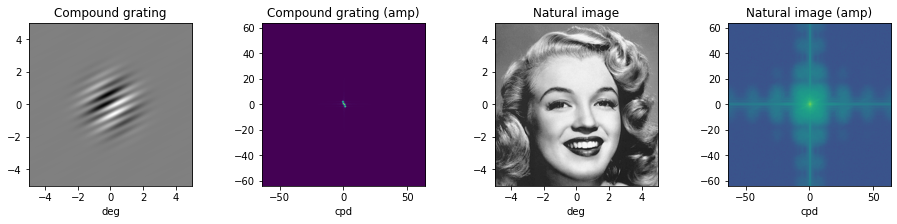

In [5]:
# Plotting
plt.figure(figsize=(16, 3))
plt.subplot(141), plt.imshow(g_sum, cmap='gray', extent=extent*2)
plt.title('Compound grating'), plt.xlabel('deg')
plt.subplot(142), plt.imshow(np.log(np.abs(scipy.fft.fftshift(g_sum_fft))+0.01), extent=fextent*2)
plt.title('Compound grating (amp)'), plt.xlabel('cpd')

plt.subplot(143), plt.imshow(img, cmap='gray', extent=extent*2)
plt.title('Natural image'), plt.xlabel('deg')
plt.subplot(144), plt.imshow(np.log(np.abs(scipy.fft.fftshift(img_fft))+0.01), extent=fextent*2)
plt.title('Natural image (amp)'), plt.xlabel('cpd')
plt.show()

In [6]:
def plot_filt(s1, s1_filt, s2, s2_filt):
    plt.figure(figsize=(16, 3))
    plt.subplot(141), plt.imshow(s1, cmap='gray', extent=extent*2)
    plt.title('Signal 1'), plt.xlabel('deg')
    plt.subplot(142), plt.imshow(s1_filt, cmap='gray', extent=extent*2)
    plt.title('Signal 1 - filt'), plt.xlabel('deg')
    plt.subplot(143), plt.imshow(s2, cmap='gray', extent=extent*2)
    plt.title('Signal 2'), plt.xlabel('deg')
    plt.subplot(144), plt.imshow(s2_filt, cmap='gray', extent=extent*2)
    plt.title('Signal 2 - filt'), plt.xlabel('deg')
    plt.show()

def plot_filt_fft(s1, s1_filt, s2, s2_filt):
    plt.figure(figsize=(16, 3))
    plt.subplot(141), plt.imshow(scipy.fft.fftshift(np.log(s1+0.01)), extent=fextent*2)
    plt.title('Signal 1'), plt.xlabel('cpd')
    plt.subplot(142), plt.imshow(scipy.fft.fftshift(np.log(s1_filt+0.01)), extent=fextent*2)
    plt.title('Signal 1 - filt'), plt.xlabel('cpd')
    plt.subplot(143), plt.imshow(scipy.fft.fftshift(np.log(s2+0.01)), extent=fextent*2)
    plt.title('Signal 2'), plt.xlabel('cpd')
    plt.subplot(144), plt.imshow(scipy.fft.fftshift(np.log(s2_filt+0.01)), extent=fextent*2)
    plt.title('Signal 2 - filt'), plt.xlabel('cpd')
    plt.show()

### "Ideal" filters: Lowpass, bandpass, highpass
These filters are most conveniently defined in the frequency domain.
They are sometimes called "ideal" filters because they perfectly remove the desired frequency-contents, i.e.
they are 0 at every frequency that should be removed and they are 1 at every frequency that should persist.

We call a filter `lowpass` if it only removes frequency contents above a certain frequency (i.e. low-frequency information passes).

Conversely, we call a filter `highpass` if it only removes frequency contents below a certain frequency (i.e. high-frequency information passes).

We call a filter `bandpass` if a desired range of frequency contents pass.

In [7]:
def ideal_filter(fx, fy, bounds):
    fxy = np.sqrt(fx**2 + fy**2)
    bandpass = np.ones(fxy.shape)
    if bounds[0] is not None:
        bandpass[fxy<[bounds[0]]] = 0
    if bounds[1] is not None:
        bandpass[fxy>[bounds[1]]] = 0
    return bandpass

def plot_ideal(flow, fhigh):
    ideal = ideal_filter(fx, fy, [flow, fhigh])
    
    plt.figure()
    plt.imshow(ideal, extent=fextent*2), plt.xlabel('deg'), plt.colorbar()
    plt.show()

interactive(plot_ideal, flow=(-1, ppd/2), fhigh=(10, ppd*0.7))

interactive(children=(FloatSlider(value=31.5, description='flow', max=64.0, min=-1.0), FloatSlider(value=49.8,…

We can use the ideal filter to selectively filter out one of the sine-wave gratings that
make up our compound grating.

As we have previously seen, natural images are broadband signals that have power in a wide range of
spatial frequency bands.
We can use the ideal filter to demonstrate what the different frequency contents in the natural image
correspond to.

In [8]:
def ideal_filtering(flow, fhigh):
    ideal = ideal_filter(fx, fy, [flow, fhigh])
    
    # Filter grating
    gfilt_fft = g_sum_fft*scipy.fft.ifftshift(ideal)
    gfilt = np.real(scipy.fft.ifft2(gfilt_fft))
    
    # Filter natural image
    imfilt_fft = img_fft*scipy.fft.ifftshift(ideal)
    imfilt = np.real(scipy.fft.ifft2(imfilt_fft))
    
    plot_filt(g_sum, gfilt, img, imfilt)
    plot_filt_fft(np.abs(g_sum_fft), np.abs(gfilt_fft), np.abs(img_fft), np.abs(imfilt_fft))

interactive(ideal_filtering, flow=(-1, 5.), fhigh=(1, 10))

interactive(children=(FloatSlider(value=2.0, description='flow', max=5.0, min=-1.0), IntSlider(value=5, descri…

### Gaussian filters: smoothing

In [9]:
# To-do: add a gaussian filter
def gauss_filtering(sigma):
    gauss = gaussian2d(xx, yy, sigma=[sigma, sigma])
    gauss_fft = scipy.fft.fft2(gauss)
    
    # Filter grating
    gfilt_fft = g_sum_fft*gauss_fft
    gfilt = np.real(scipy.fft.ifftshift(scipy.fft.ifft2(gfilt_fft)))
    
    # Filter natural image
    imfilt_fft = img_fft*gauss_fft
    imfilt = np.real(scipy.fft.ifftshift(scipy.fft.ifft2(imfilt_fft)))
    
    plot_filt(g_sum, gfilt, img, imfilt)
    plot_filt_fft(np.abs(g_sum_fft), np.abs(gfilt_fft), np.abs(img_fft), np.abs(imfilt_fft))

interactive(gauss_filtering, sigma=(0.1, 0.3, 0.01))

interactive(children=(FloatSlider(value=0.2, description='sigma', max=0.3, min=0.1, step=0.01), Output()), _do…

## Visual processing as a cascade of filtering operations

### The receptive field of a visual neuron as a filter

In the first layers of visual processing (retina, LGN, V1, ...), cells are spatially arranged
in a way that adjacent cells respond to partially overlapping portions of the visual field.

We tend to characterize these cells based on their so-called receptive field properties.
The receptive field of a cell is the region of the visual field that makes a cell change its
firing in the presence of a certain visual stimulation.
The type of visual stimulation that a cell preferrably responds to can differ both in their
spatial as well as temporal properties.
Analogously, we can model the behavior of visual cells using spatial and temporal filters.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" width="500"/>
<center>  Animation of a convolution. <a href="https://en.wikipedia.org/wiki/Convolution">wikipedia</a></center>  

<img src="https://miro.medium.com/max/1400/1*bv7EBb98fNmocOkESULgRQ.png" width="800"/>
<center>  Vision as a cascade of filtering operations. <a href="https://lamiae-hana.medium.com/an-intro-to-convolutional-neural-networks-cnn-9f1c2d888fa1">ref</a></center>  

But what are the features that the early visual system is most sensitive to?
The receptive field properties that are most studied and can be best described, are the
receptive fields of retinal ganglion cells, cells in LGN and simple and complex cells in V1.

Let's have a look into some characteristics of cells along the first layers of visual processing.

### Receptive fields of retinal ganglion cells and cells in LGN

The repective fields of retinal ganglion cells and LGN cells are often described as
concentric (ie circular) center-surround receptive fields that either respond to
light increments in the center and decrements in the surround (ON-center-OFF-surround)
or they respond to light decrements in the center and light increments in the surround
(OFF-center-ON-surround).

We can model their behavior using DOG-filters [(Rodieck, 1965)](https://doi.org/10.1016/0042-6989(65)90033-7)

In [10]:
def gaussian2d(x, y, sigma, orientation=0):
    # determine a, b, c coefficients
    a = (np.cos(orientation)**2 / (2*sigma[0]**2)) + (np.sin(orientation)**2 / (2*sigma[1]**2))
    b = -(np.sin(2*orientation) / (4*sigma[0]**2)) + (np.sin(2*orientation) / (4*sigma[1]**2))
    c = (np.sin(orientation)**2 / (2*sigma[0]**2)) + (np.cos(orientation)**2 / (2*sigma[1]**2))

    # create Gaussian
    gaussian = np.exp(-(a*x**2 + 2*b*x*y + c*y**2))
    return gaussian


def create_odog(xx, yy, sigma_c, sigma_s, orientation):
    # Create center and surround anisotropic Gaussian filters
    center = gaussian2d(xx, yy, sigma=sigma_c, orientation=orientation)
    surround = gaussian2d(xx, yy, sigma=sigma_s, orientation=orientation)

    # Normalize each filter by its total sum
    center = center / center.sum()
    surround = surround / surround.sum()
    return center - surround

In [11]:
def plot_dog(sigma_c, sigma_s):
    dog = create_odog(xx, yy, (sigma_c, sigma_c), (sigma_s, sigma_s), 0)
    plt.imshow(dog, extent=extent*2, cmap='coolwarm')

interactive(plot_dog, sigma_c=(0.01, 0.1, 0.01), sigma_s=(0.02, 0.2, 0.01))

interactive(children=(FloatSlider(value=0.05, description='sigma_c', max=0.1, min=0.01, step=0.01), FloatSlide…

In [12]:
def dog_filtering(sigma_c, sigma_s):
    dog = create_odog(xx, yy, (sigma_c, sigma_c), (sigma_s, sigma_s), 0)
    imfilt_ON = scipy.signal.fftconvolve(img, dog, "same")
    imfilt_OFF = scipy.signal.fftconvolve(img, -dog, "same")
    
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.imshow(img, cmap='gray', extent=extent*2)
    plt.subplot(142)
    plt.imshow(dog, extent=extent*2)
    plt.subplot(143)
    plt.imshow(imfilt_ON, cmap='coolwarm', extent=extent*2), plt.title('ON-center')
    plt.subplot(144)
    plt.imshow(imfilt_OFF, cmap='coolwarm', extent=extent*2), plt.title('OFF-center')

interactive(dog_filtering, sigma_c=(0.02, 0.2, 0.01), sigma_s=(0.04, 0.4, 0.01))

interactive(children=(FloatSlider(value=0.11, description='sigma_c', max=0.2, min=0.02, step=0.01), FloatSlide…

### Receptive fields of cells in V1
Compared to retinal ganglion cells and LGN cells, cells in V1 have two relevant properties:
1. Spatial-frequency-tuning
2. Orientation tuning

Thus, cell in V1 are often described as a multitude of filters that respond best to
a variety of different spatial frequencies and orientations.

One way to model the behavior of simple cells is by using ODOG-filters.

In [13]:
def plot_odog(sigma_c, orientation):
    odog = create_odog(xx, yy, (sigma_c, sigma_c), (sigma_c, sigma_c*2), orientation*np.pi/180.)
    plt.imshow(odog, extent=extent*2, cmap='coolwarm')

interactive(plot_odog, sigma_c=(0.02, 0.2, 0.01), orientation=(0, 90))

interactive(children=(FloatSlider(value=0.11, description='sigma_c', max=0.2, min=0.02, step=0.01), IntSlider(…

In [14]:
def odog_filtering(sigma_c, orientation):
    odog = create_odog(xx, yy, (sigma_c, sigma_c), (sigma_c, sigma_c*2), orientation*np.pi/180.)
    imfilt = scipy.signal.fftconvolve(img, odog, "same")
    
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.imshow(img, cmap='gray', extent=extent*2)
    plt.subplot(142)
    plt.imshow(odog, extent=extent*2)
    plt.subplot(143)
    plt.imshow(imfilt, cmap='coolwarm', extent=extent*2)

interactive(odog_filtering, sigma_c=(0.02, 0.2, 0.01), orientation=(0, 90))

interactive(children=(FloatSlider(value=0.11, description='sigma_c', max=0.2, min=0.02, step=0.01), IntSlider(…

## To-do: add relationship between RGC-RFs and V1-RFs

## Spatiotemporal properties of the visual system

### The contrast sensitivity function

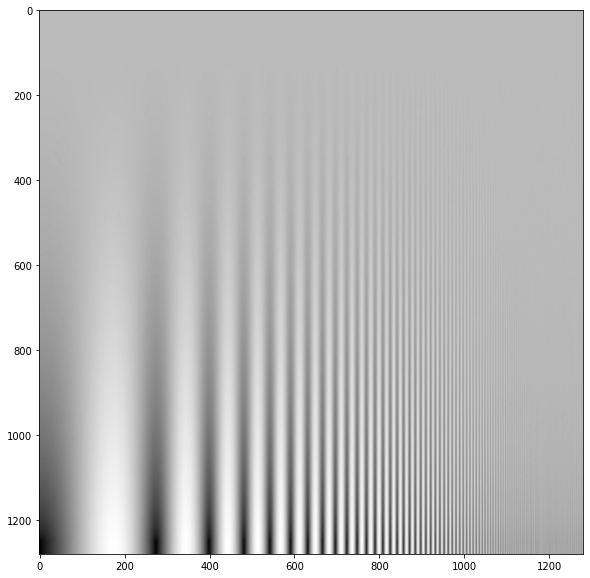

In [15]:
# Read-in CSF image
img_csf = cv2.cvtColor(cv2.imread('CSF.jpg'), cv2.COLOR_BGR2GRAY)
img_csf = cv2.resize(img_csf, [nX, nX]) / 255

plt.figure(figsize=(10,10))
plt.imshow(img_csf, cmap='gray')
plt.show()

### The CSF and multi-scale spatial filtering

In [16]:
# Spatiotemporal csf functions taken from Kelly1979:
def human_csf(sfs, tf):
    # The equation does not allow sf=0, so we implement a small workaround
    sfs2 = np.copy(sfs)
    idx = np.where(sfs2 == 0.)
    sfs2[sfs == 0.] = 1.
    
    # Calculate "velocity" needed for formula
    v = tf / sfs2
    
    # Calculate contrast sensitivity function:
    k = 6.1 + 7.3 * np.abs(np.log10(v/3.))**3.
    amax = 45.9 / (v + 2.)
    csf = k * v * (2.*np.pi*sfs2)**2. * np.exp((-4.*np.pi*sfs2) / amax)
    csfplt = 1. / csf
    
    if len(idx):
        csf[idx] = 0.
        csfplt[idx] = 0.
    return csf, csfplt

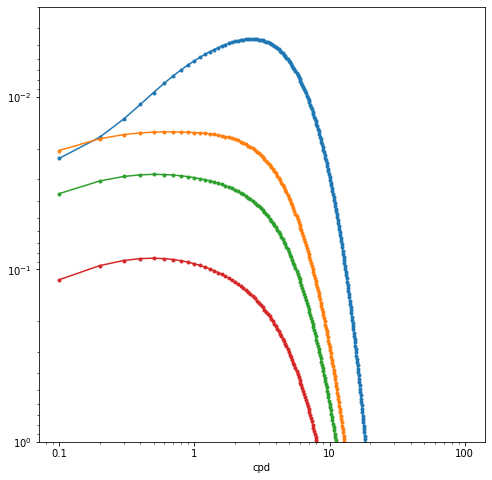

In [17]:
# Plotting
a = np.linspace(0.1, 100, 1000)
w_all = np.array([2., 13.5, 17., 23.])

plt.figure(figsize=(8, 8))
for i in range(len(w_all)):
    csf, csfplt = human_csf(a, w_all[i])
    plt.plot(a, csfplt, '.-', label=str(w_all[i]) + ' Hz')
plt.xlabel('cpd'), plt.xscale('log'), plt.xticks([0.1, 1, 10, 100], [0.1, 1, 10, 100])
plt.yscale('log'), plt.ylim(1, 0.003)
plt.show()

## Other applications

### Multi-scale spatial filtering and brightness perception

### Consequences of fixational eye movements

In [18]:
# Create spatial RF of retinal ganglion cells
def spatialRF_retina(fx, fy, rc, Kc, rs, Ks):
    # Spatial response profile in frequency domain
    center = Kc * np.pi * rc**2. * np.exp(-(np.pi*rc*np.sqrt(fx**2.+fy**2.))**2.)
    surround = Ks * np.pi * rs**2. * np.exp(-(np.pi*rs*np.sqrt(fx**2.+fy**2.))**2.)
    rf = center - surround
    
    # Originally, they are not balanced
    rf[int(nX/2), int(nX/2)] = 0
    return rf

In [19]:
# Values taken from Croner & Kaplan (1995)
spatial_Mcell = spatialRF_retina(fx, fy, rc=0.1, Kc=148., rs=0.72, Ks=1.1)
spatial_Pcell = spatialRF_retina(fx, fy, rc=0.03, Kc=325.2, rs=0.18, Ks=4.4)

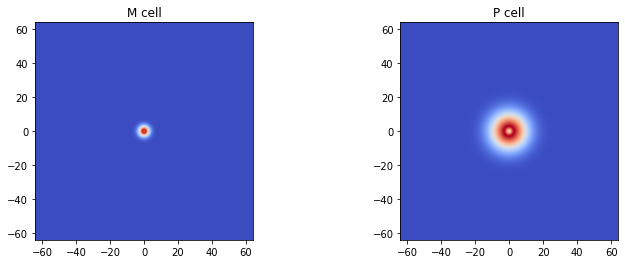

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(spatial_Mcell, extent=fextent*2, cmap='coolwarm'), plt.title('M cell')

plt.subplot(122)
plt.imshow(spatial_Pcell, extent=fextent*2, cmap='coolwarm'), plt.title('P cell')
plt.show()